# Assignment Week 7: Text Mining using Dimensionality Reduction Methods

## Student ID: 250979448

This dataset comes from the Amazon website and represents 1,000 reviews which were labeled (by humans) as positive or negative. In this coursework, we will study how we can use dimensionality reduction methods to improve our understanding of text data and to predict the sentiment of a set of texts. This application of data science is called [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) and it is widely used across many fields to get automated feedback when text opinions are expressed. While most modern methods of sentiment analysis are using complex deep learning methods, the tools we have seen this week can be readily applied to get a good idea of what our users are expressing.

In [1]:
#!pip install umap-learn
#!gdown https://drive.google.com/uc?id=1habwBbNCj6wFIDvxLa7hdP2xakA_tcDG

In [2]:
# Import other packages if you need them!
import numpy as np
import pandas as pd
import umap
from sklearn.decomposition import PCA, TruncatedSVD
import sklearn.feature_extraction.text as sktext
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from itertools import product

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Decomposition of the texts [65 pts]

[10 pts] 1. The dataset comes with the text and a binary variable which represents the sentiment, either positive or negative. Import the data and use sklearn's `TfidfVectorizer` to eliminate accents, special characters, and stopwords. In addition, make sure to eliminate words that appear in less than 5% of documents and those that appear in over 95%. You can also set `sublinear_tf` to `True`. After that, split the data into train and test with `test_size = 0.3`. Calculate the [Tf-Idf transform](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) for both train and test. Note that you need to fit and transform the inputs for the train set but you only need to transform the inputs for the test set. Don't forget to turn the sparse matrices to dense ones after you apply the `Tf-Idf` transform.  

In [3]:
df = pd.read_csv("Reviews_sample.csv")
df.head()

,text,label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1


In [4]:
# Be sure to first read the data here!
df = pd.read_csv("Reviews_sample.csv")
df.head()

# Defining the TfIDFTransformer
TfIDFTransformer = sktext.TfidfVectorizer(strip_accents='unicode', # accents & special characters
                                        stop_words='english', # stop words
                                        min_df = 0.05, # bottom 5%
                                        max_df = 0.95, # 95%
                                        sublinear_tf=True
                                        )


# Train/test split
X = df.text
y = df.label

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


# Calculate the Tf-Idf transform
TfIDF_train = TfIDFTransformer.fit_transform(x_train)
TfIDF_test = TfIDFTransformer.fit_transform(x_test)


# Turn to dense matrix as PCA does not like sparse ones
TfIDF_train = TfIDF_train.todense()
TfIDF_test = TfIDF_test.todense()

From here on, you will use the variables `TfIDF_train` and `TfIDF_test` as the input for the different tasks, and the `y_train` and `y_test` labels for each dataset (if required). Print the number of indices in the ouput using [`TfIDFTransformer.get_feature_names()` method](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

In [5]:
# Print the number of indices
word_index = TfIDFTransformer.get_feature_names()
len(word_index)

['actually',
 'bad',
 'best',
 'better',
 'big',
 'book',
 'books',
 'boring',
 'bought',
 'buy',
 'cd',
 'characters',
 'children',
 'classic',
 'did',
 'didn',
 'does',
 'don',
 'easy',
 'going',
 'good',
 'got',
 'great',
 'hard',
 'hawthorne',
 'highly',
 'just',
 'know',
 'letter',
 'like',
 'little',
 'long',
 'look',
 'love',
 'make',
 'makes',
 'maybe',
 'money',
 'movie',
 'music',
 'need',
 'new',
 'novel',
 'old',
 'people',
 'place',
 'point',
 'product',
 'read',
 'reading',
 'really',
 'recommend',
 'right',
 'story',
 'thing',
 'think',
 'thought',
 'time',
 'used',
 've',
 'want',
 'way',
 'work',
 'worth',
 'writing',
 'written',
 'years']

[10 pts] 2. Now we have the TfIDF matrix so we can start working on the data. We want to explore what some commonly occuring concepts are in the text reviews. We can do this using PCA (normally you'll do this with SVD, but in this coursework you'll use it in the next task). A PCA transform of the TF-IDF matrix will give us a basis of the text data, each representing a *concept* or set of words that are correlated. Correlation in text can be interpreted as a relation to a similar topic. Calculate a PCA transform of the training data using the **maximum** number of concepts possible. Make a plot of the explained variance that shows the cumulative explained variance per number of concepts.

**Written answer: Exactly how many concepts do we need to correctly explain at least 75% of the data?**

The total explained variance of the first 66 components is 88.293


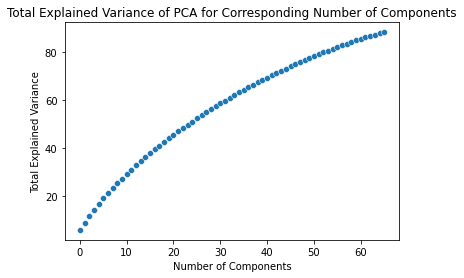

In [6]:
# Your code here
nPCA = PCA(n_components=66)
nPCA.fit(TfIDF_train)

total_variance = np.sum(nPCA.explained_variance_) * 100
print('The total explained variance of the first %i components is %.3f' % (nPCA.n_components_, total_variance))

# Make the plot
Z1 = nPCA.transform(TfIDF_train)
cumulative_var = np.cumsum(nPCA.explained_variance_) * 100
sns.scatterplot(data = cumulative_var)
plt.xlabel("Number of Components")
plt.ylabel("Total Explained Variance")
plt.title("Total Explained Variance of PCA for Corresponding Number of Components")
plt.show()


In [8]:
# To get the exact index where the variance is above 75%
np.where(cumulative_var > 75)

(array([47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65], dtype=int64),)

**Written answer:** Since the cumulative_var array has value greater than 75 at index 45, this means that we need 46 components to explain at least 75% of the data.

[15 pts] 3. Study the first three concepts. To do this, show the 10 words that are the most important in each of these three concepts (as revealed by the absolute value of the PCA weight in each concept).

**Written answer: What is the cumulative variance explained by these three concepts? What would you name each of these concepts?**
*Hint: If in a concept you would get the words 'dog', 'cat', 'fish' as the most important ones, you could name the concept 'animals' or 'pets'.*

In [9]:
# Explained variance
nPCA.explained_variance_

array([0.05941949, 0.02878235, 0.02785666, 0.02652913, 0.02451078,
       0.0234077 , 0.02181264, 0.0212569 , 0.02034891, 0.01920407,
       0.0186354 , 0.01823051, 0.01797702, 0.01708553, 0.0168395 ,
       0.0163941 , 0.01622363, 0.01585928, 0.01533282, 0.01501236,
       0.01472941, 0.01448086, 0.0140243 , 0.01388979, 0.01322385,
       0.01304061, 0.01293403, 0.0126723 , 0.01242837, 0.01206087,
       0.0120061 , 0.01184069, 0.01167227, 0.01116529, 0.0110641 ,
       0.01082071, 0.01072579, 0.01052113, 0.01033485, 0.00989862,
       0.0097593 , 0.00972639, 0.00961823, 0.00947428, 0.0089169 ,
       0.00887103, 0.00874184, 0.00867418, 0.00857011, 0.00827213,
       0.00811944, 0.00794641, 0.00783948, 0.00764587, 0.00741985,
       0.00737326, 0.00725667, 0.00699719, 0.00680658, 0.00650793,
       0.00625526, 0.00603648, 0.0059494 , 0.00545725, 0.00533158,
       0.00511152])

In [10]:
# Get words per component
nPCA.components_[0,:]

array([ 5.17835215e-02,  5.86040232e-03,  7.86345603e-03, -3.97317477e-02,
        8.00981349e-01,  8.64526020e-02,  4.20296797e-02, -1.08767168e-01,
       -1.11622836e-01,  4.76839832e-02,  6.26031567e-02, -7.19380038e-02,
       -9.90508015e-03, -1.73938348e-02, -4.83693709e-02, -3.25552976e-02,
       -1.68026619e-02, -7.96452341e-02, -1.41878666e-02,  2.47958779e-02,
       -4.84812567e-02, -5.01077861e-02,  6.27327781e-02, -6.67610762e-02,
       -1.23425434e-02,  4.28051831e-03, -7.63910371e-02, -2.41704740e-02,
        6.23311072e-03, -3.94864195e-02, -9.71953706e-03, -8.04244640e-02,
       -3.41208040e-02, -3.90325196e-02, -7.99150347e-02, -1.57730264e-01,
       -1.51220168e-02, -3.77063602e-02,  5.31236983e-02, -4.10455841e-02,
       -5.33150666e-03,  5.75672937e-02, -1.79198094e-01,  3.63437615e-01,
        1.01480369e-01, -6.26808136e-02,  2.57358569e-02,  1.72713516e-02,
       -1.99830611e-02,  4.16392105e-02, -3.10969924e-02, -2.61682312e-03,
       -1.78377213e-02,  

In [11]:
# Concept 1
word_index[nPCA.components_[0,:] > 0]

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# Concept 2
word_index[nPCA.components_[1,:] > 0]

In [ ]:
# Concept 3
word_index[nPCA.components_[2,:] > 0]

**Written answer:**

[10 pts] 4. Apply the PCA transformation to the test dataset. Using only the first two components, make a scatter plot of the cases. Identify positive and negative cases by colouring points with different sentiments with different colours.

**Written answer: What can we say about where the positive and negative cases lie in our plot? Could we use these concepts to discriminate positive and negative cases? If yes, why? If no, why not? Discuss your findings.**

In [ ]:
# Apply PCA to the test dataset
pca = PCA(n_components=2)
pca.fit(TfIDF_test)


# Plot the two different set of points filtering by label
Z2 = pca.transform(TfIDF_test)
sns.scatterplot(x=Z2[:, 0], y=Z2[:, 1], hue =  y_test)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA of IMDB texts")
plt.show()


**Written answer:**

[20 pts] 5. Repeat the process above, only now using a UMAP projection with two components. Test all combinations of ```n_neighbors=[2, 10, 25]``` and ```min_dist=[0.1, 0.25, 0.5]``` over the train data and choose the projection that you think is best, and apply it over the test data. Use 1000 epochs, a cosine metric and random initialization. If you have more than 8GB of RAM (as in Colab), you may want to set ```low_memory=False``` to speed up computations.

*Hint: [This link](https://stackoverflow.com/questions/16384109/iterate-over-all-combinations-of-values-in-multiple-lists-in-python) may be helpful.*

Written answer: How does the plot compare to the PCA one?

UMAP(angular_rp_forest=True, metric='cosine', n_epochs=1000, n_neighbors=2, random_state=42, verbose=True)
Mon Mar 28 15:03:19 2022 Construct fuzzy simplicial set
Mon Mar 28 15:03:20 2022 Finding Nearest Neighbors
Mon Mar 28 15:03:23 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:03:25 2022 Construct embedding


C:\Users\VBran\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:03:27 2022 Finished embedding


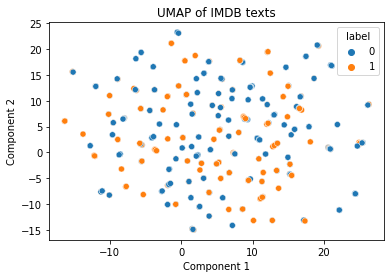

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.25, n_epochs=1000, n_neighbors=2, random_state=42, verbose=True)
Mon Mar 28 15:03:28 2022 Construct fuzzy simplicial set
Mon Mar 28 15:03:28 2022 Finding Nearest Neighbors
Mon Mar 28 15:03:28 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:03:28 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:03:30 2022 Finished embedding


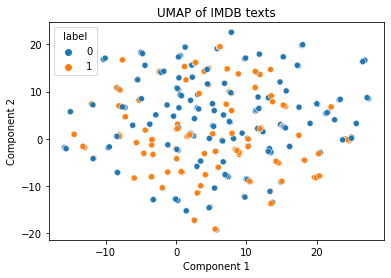

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.5, n_epochs=1000, n_neighbors=2, random_state=42, verbose=True)
Mon Mar 28 15:03:30 2022 Construct fuzzy simplicial set
Mon Mar 28 15:03:30 2022 Finding Nearest Neighbors
Mon Mar 28 15:03:30 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:03:30 2022 Construct embedding


C:\Users\VBran\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:03:32 2022 Finished embedding


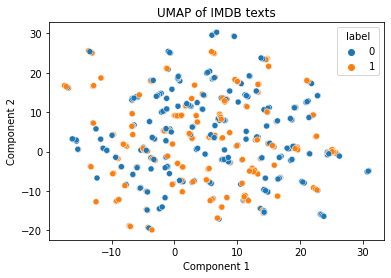

UMAP(angular_rp_forest=True, metric='cosine', n_epochs=1000, n_neighbors=10, random_state=42, verbose=True)
Mon Mar 28 15:03:32 2022 Construct fuzzy simplicial set
Mon Mar 28 15:03:33 2022 Finding Nearest Neighbors
Mon Mar 28 15:03:33 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:03:33 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:03:36 2022 Finished embedding


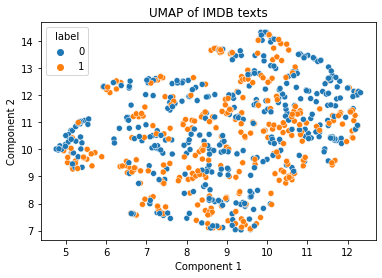

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.25, n_epochs=1000, n_neighbors=10, random_state=42, verbose=True)
Mon Mar 28 15:03:36 2022 Construct fuzzy simplicial set
Mon Mar 28 15:03:37 2022 Finding Nearest Neighbors
Mon Mar 28 15:03:37 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:03:37 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:03:40 2022 Finished embedding


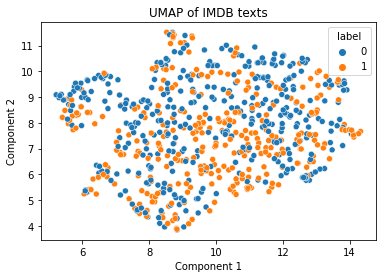

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.5, n_epochs=1000, n_neighbors=10, random_state=42, verbose=True)
Mon Mar 28 15:03:40 2022 Construct fuzzy simplicial set
Mon Mar 28 15:03:41 2022 Finding Nearest Neighbors
Mon Mar 28 15:03:41 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:03:41 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:03:45 2022 Finished embedding


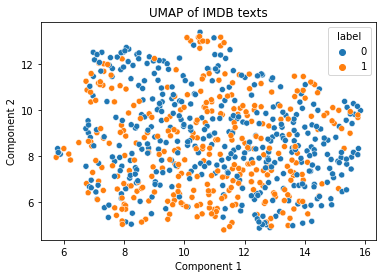

UMAP(angular_rp_forest=True, metric='cosine', n_epochs=1000, n_neighbors=25, random_state=42, verbose=True)
Mon Mar 28 15:03:45 2022 Construct fuzzy simplicial set
Mon Mar 28 15:03:45 2022 Finding Nearest Neighbors
Mon Mar 28 15:03:45 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:03:45 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:03:50 2022 Finished embedding


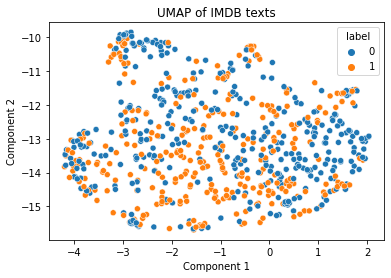

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.25, n_epochs=1000, n_neighbors=25, random_state=42, verbose=True)
Mon Mar 28 15:03:51 2022 Construct fuzzy simplicial set
Mon Mar 28 15:03:51 2022 Finding Nearest Neighbors
Mon Mar 28 15:03:51 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:03:51 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:03:56 2022 Finished embedding


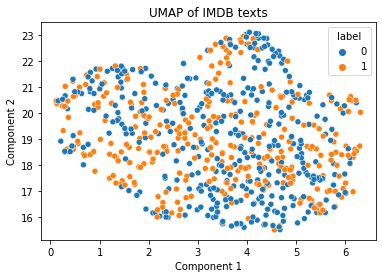

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.5, n_epochs=1000, n_neighbors=25, random_state=42, verbose=True)
Mon Mar 28 15:03:56 2022 Construct fuzzy simplicial set
Mon Mar 28 15:03:57 2022 Finding Nearest Neighbors
Mon Mar 28 15:03:57 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:03:57 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:04:02 2022 Finished embedding


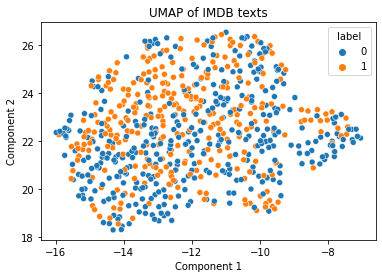

In [25]:
# Create UMAP and plots (15 pts). Add more blocks if you need them, but it can be done in just one for block!
import itertools

n_neighbors=[2, 10, 25]
min_dist=[0.1, 0.25, 0.5]

for x in itertools.product(n_neighbors, min_dist):
    
    reducer = umap.UMAP(n_neighbors=x[0],              # Number of neareast neighbours to use. 
                    n_components=2,              # Number of components. UMAP is robust to larger values
                    metric='cosine',          # Metric to use.
                    n_epochs=1000,               # Iterations. Set to convergence. None implies either 200 or 500.
                    min_dist=x[1],                # Minimum distance embedded points. Smaller makes clumps, larger, sparseness.
                    spread=1.0,                  # Scale to combine with min_dist
                    low_memory=True,             # Run slower, but with less memory.
                    n_jobs=-1,                   # Cores to use
                    random_state=42,             # Random seed
                    verbose=True                 # Verbosity
                   )
    
    UMAP_embedding = reducer.fit_transform(TfIDF_train)
    
    sns.scatterplot(x=UMAP_embedding[:, 0], y=UMAP_embedding[:, 1], hue=y_train)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("UMAP of IMDB texts")
    plt.show()


The ninth graph seems to be the best. Use n_neighbours = 25 and min_dist = 0.5
UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.5, n_epochs=1000, n_neighbors=25, random_state=42, verbose=True)
Mon Mar 28 15:12:02 2022 Construct fuzzy simplicial set
Mon Mar 28 15:12:02 2022 Finding Nearest Neighbors
Mon Mar 28 15:12:02 2022 Finished Nearest Neighbor Search
Mon Mar 28 15:12:02 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Mon Mar 28 15:12:05 2022 Finished embedding


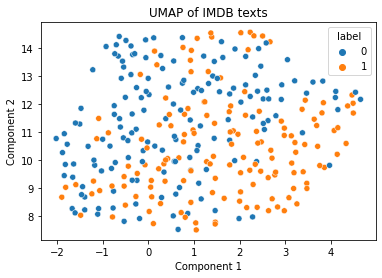

In [29]:
# Choose one and apply to test set (5 pts)
print("The ninth graph seems to be the best. Use n_neighbours = 25 and min_dist = 0.5")

preffered_reducer = umap.UMAP(n_neighbors=25,              # Number of neareast neighbours to use. 
                    n_components=2,              # Number of components. UMAP is robust to larger values
                    metric='cosine',          # Metric to use.
                    n_epochs=1000,               # Iterations. Set to convergence. None implies either 200 or 500.
                    min_dist=0.5,                # Minimum distance embedded points. Smaller makes clumps, larger, sparseness.
                    spread=1.0,                  # Scale to combine with min_dist
                    low_memory=True,             # Run slower, but with less memory.
                    n_jobs=-1,                   # Cores to use
                    random_state=42,             # Random seed
                    verbose=True                 # Verbosity
                   )

UMAP_embedding = preffered_reducer.fit_transform(TfIDF_test)
    
sns.scatterplot(x=UMAP_embedding[:, 0], y=UMAP_embedding[:, 1], hue=y_test)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("UMAP of IMDB texts")
plt.show()


## Task 2: Benchmarking predictive capabilities of the compressed data [35 pts]

For this task, we will benchmark the predictive capabilities of the compressed data against the original one. For this:

[10 pts] 1. Train a regularized logistic regression over the original TfIDF train set (with no compression) using l2 regularization. Calculate the AUC score and plot the ROC curve for the original test set.

[10 pts] 2. Train a regularized logistic regression over an SVD-reduced dataset (with 10 components) using l2 regularization. Calculate the AUC score and plot the ROC curve for the SVD-transformed test set.

[10 pts] 3. Train a regularized logistic regression over the UMAP-reduced dataset (with 10 components using the same parameters as Task 1.5) using l2 regularization. Calculate the AUC score and plot the ROC curve for the UMAP-transformed test set.

[5 pts] **Written answer: Compare the performance of the three models: how do they compare? Why do you think UMAP performs like that when using logistic regression?**

In [24]:
from sklearn.linear_model import LogisticRegression
# Full dataset
LOGREG = LogisticRegression(penalty="none", max_iter=10000)

# Train!
logreg = LOGREG.fit(TfIDF_train, y_train)

# Apply to the test dataset
ytest_hat = logreg.predict(TfIDF_test)

# Calculate the ROC curve points
ytest_prob = logreg.predict_proba(TfIDF_test)
fpr, tpr, _ = roc_curve(y_test, ytest_prob[:,1], pos_label="1")
#ax = sns.lineplot(fpr, tpr)
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curve for Simple Classifier")

# Save the AUC in a variable to display it. Round it first


# Create and show the plot



C:\Users\VBran\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:705: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = (y_true == pos_label)


TypeError: 'bool' object is not subscriptable

In [ ]:
# TruncatedSVD


# LogReg object


# Train!


# Apply to the test dataset


# Calculate the ROC curve points


# Save the AUC in a variable to display it. Round it first


# Create and show the plot



In [ ]:
# UMAP


# LogReg object


# Train!


# Apply to the test dataset


# Calculate the ROC curve points


# Save the AUC in a variable to display it. Round it first


# Create and show the plot



**Written answer:**